# Chapter 14: Statistical modelling

Robert Johansson

Source code listings for [Numerical Python - Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib](https://www.apress.com/us/book/9781484242452) (ISBN 978-1-484242-45-2).

In [1]:
import statsmodels.api as sm

In [2]:
import statsmodels.formula.api as smf

In [3]:
import statsmodels.graphics.api as smg

In [4]:
import patsy

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
import pandas as pd

In [8]:
from scipy import stats

In [9]:
import seaborn as sns

## Statistical models and patsy formula

In [10]:
np.random.seed(123456789)

In [11]:
y = np.array([1, 2, 3, 4, 5])

In [12]:
x1 = np.array([6, 7, 8, 9, 10])

In [13]:
x2 = np.array([11, 12, 13, 14, 15])

In [14]:
X = np.vstack([np.ones(5), x1, x2, x1*x2]).T

In [15]:
X

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [16]:
beta, res, rank, sval = np.linalg.lstsq(X, y)

/Users/rob/miniconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [17]:
beta

array([-5.55555556e-01,  1.88888889e+00, -8.88888889e-01, -8.88178420e-16])

In [18]:
data = {"y": y, "x1": x1, "x2": x2}

In [19]:
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1*x2", data)

In [20]:
y

DesignMatrix with shape (5, 1)
  y
  1
  2
  3
  4
  5
  Terms:
    'y' (column 0)

In [21]:
X

DesignMatrix with shape (5, 4)
  Intercept  x1  x2  x1:x2
          1   6  11     66
          1   7  12     84
          1   8  13    104
          1   9  14    126
          1  10  15    150
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [22]:
type(X)

patsy.design_info.DesignMatrix

In [23]:
np.array(X)

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [24]:
df_data = pd.DataFrame(data)

In [25]:
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1:x2", df_data, return_type="dataframe")

In [26]:
X

,Intercept,x1,x2,x1:x2
0,1.0,6.0,11.0,66.0
1,1.0,7.0,12.0,84.0
2,1.0,8.0,13.0,104.0
3,1.0,9.0,14.0,126.0
4,1.0,10.0,15.0,150.0


In [27]:
model = sm.OLS(y, X)

In [28]:
result = model.fit()

In [29]:
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -6.661338e-16
dtype: float64

In [30]:
model = smf.ols("y ~ 1 + x1 + x2 + x1:x2", df_data)

In [31]:
result = model.fit()

In [32]:
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -6.661338e-16
dtype: float64

In [33]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.807e+27
Date:                Mon, 06 May 2019   Prob (F-statistic):           3.56e-28
Time:                        15:42:33   Log-Likelihood:                 149.18
No. Observations:                   5   AIC:                            -292.4
Df Residuals:                       2   BIC:                            -293.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5556   9.62e-14  -5.77e+12      0.0

/Users/rob/miniconda3/envs/py3.6/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [34]:
beta

array([-5.55555556e-01,  1.88888889e+00, -8.88888889e-01, -8.88178420e-16])

In [35]:
from collections import defaultdict

In [36]:
data = defaultdict(lambda: np.array([1,2,3]))

In [37]:
patsy.dmatrices("y ~ a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [38]:
patsy.dmatrices("y ~ 1 + a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [39]:
patsy.dmatrices("y ~ -1 + a + b", data=data)[1].design_info.term_names

['a', 'b']

In [40]:
patsy.dmatrices("y ~ a * b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b']

In [41]:
patsy.dmatrices("y ~ a * b * c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c', 'a:b:c']

In [42]:
patsy.dmatrices("y ~ a * b * c - a:b:c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c']

In [43]:
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}

In [44]:
patsy.dmatrices("y ~ a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [45]:
patsy.dmatrices("y ~ I(a + b)", data=data)[1].design_info.term_names

['Intercept', 'I(a + b)']

In [46]:
patsy.dmatrices("y ~ a*a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [47]:
patsy.dmatrices("y ~ I(a**2)", data=data)[1].design_info.term_names

['Intercept', 'I(a ** 2)']

In [48]:
patsy.dmatrices("y ~ np.log(a) + b", data=data)[1].design_info.term_names

['Intercept', 'np.log(a)', 'b']

In [49]:
z = lambda x1, x2: x1+x2

In [50]:
patsy.dmatrices("y ~ z(a, b)", data=data)[1].design_info.term_names

['Intercept', 'z(a, b)']

### Categorical variables

In [51]:
data = {"y": [1, 2, 3], "a": [1, 2, 3]}

In [52]:
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a
0,1.0
1,2.0
2,3.0


In [53]:
patsy.dmatrices("y ~ - 1 + C(a)", data=data, return_type="dataframe")[1]

,C(a)[1],C(a)[2],C(a)[3]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [54]:
data = {"y": [1, 2, 3], "a": ["type A", "type B", "type C"]}

In [55]:
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a[type A],a[type B],a[type C]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [56]:
patsy.dmatrices("y ~ - 1 + C(a, Poly)", data=data, return_type="dataframe")[1]

,"C(a, Poly).Constant","C(a, Poly).Linear","C(a, Poly).Quadratic"
0,1.0,-7.071068e-01,0.408248
1,1.0,-5.551115e-17,-0.816497
2,1.0,7.071068e-01,0.408248


# Linear regression

In [57]:
np.random.seed(123456789)

In [58]:
N = 100

In [59]:
x1 = np.random.randn(N)

In [60]:
x2 = np.random.randn(N)

In [61]:
data = pd.DataFrame({"x1": x1, "x2": x2})

In [62]:
def y_true(x1, x2):
    return 1  + 2 * x1 + 3 * x2 + 4 * x1 * x2

In [63]:
data["y_true"] = y_true(x1, x2)

In [64]:
e = np.random.randn(N)

In [65]:
data["y"] = data["y_true"] + e

In [66]:
data.head()

,x1,x2,y_true,y
0,2.212902,-0.474588,-0.198823,-1.452775
1,2.128398,-1.524772,-12.298805,-12.560965
2,1.841711,-1.939271,-15.420705,-14.715090
3,0.082382,0.345148,2.313945,1.190283
4,0.858964,-0.621523,-1.282107,0.307772


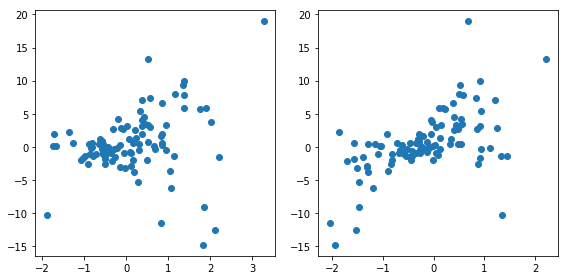

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].scatter(data["x1"], data["y"])
axes[1].scatter(data["x2"], data["y"])

fig.tight_layout()

In [68]:
data.shape

(100, 4)

In [69]:
model = smf.ols("y ~ x1 + x2", data)

In [70]:
result = model.fit()

In [71]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     29.76
Date:                Mon, 06 May 2019   Prob (F-statistic):           8.36e-11
Time:                        15:42:50   Log-Likelihood:                -271.52
No. Observations:                 100   AIC:                             549.0
Df Residuals:                      97   BIC:                             556.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9868      0.382      2.581      0.0

In [72]:
result.rsquared

0.3802538325513254

In [73]:
result.resid.head()

0    -3.370455
1   -11.153477
2   -11.721319
3    -0.948410
4     0.306215
dtype: float64

In [74]:
z, p = stats.normaltest(result.resid.values)

In [75]:
p

4.6524990253009316e-05

In [76]:
result.params

Intercept    0.986826
x1           1.081044
x2           3.079284
dtype: float64

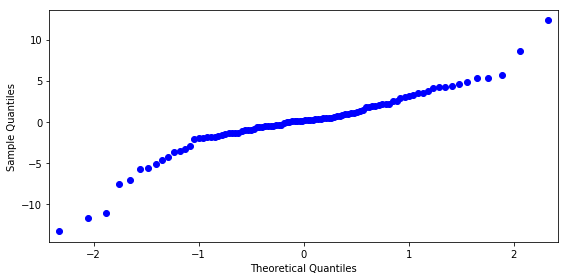

In [77]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()
fig.savefig("ch14-qqplot-model-1.pdf")

In [78]:
model = smf.ols("y ~ x1 + x2 + x1*x2", data)

In [79]:
result = model.fit()

In [80]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     684.5
Date:                Mon, 06 May 2019   Prob (F-statistic):           1.21e-64
Time:                        15:42:53   Log-Likelihood:                -140.01
No. Observations:                 100   AIC:                             288.0
Df Residuals:                      96   BIC:                             298.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8706      0.103      8.433      0.0

In [81]:
result.params

Intercept    0.870620
x1           1.969345
x2           2.967004
x1:x2        3.943993
dtype: float64

In [82]:
result.rsquared

0.9553393745884368

In [83]:
z, p = stats.normaltest(result.resid.values)

In [84]:
p

0.22874710482505126

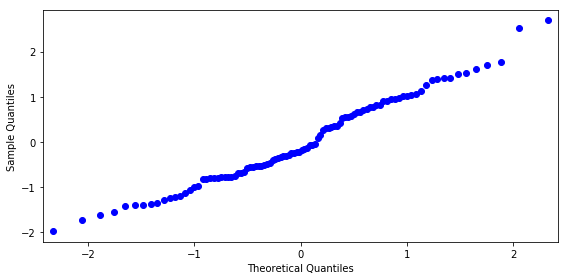

In [85]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()
fig.savefig("ch14-qqplot-model-2.pdf")

In [86]:
x = np.linspace(-1, 1, 50)

In [87]:
X1, X2 = np.meshgrid(x, x)

In [88]:
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})

In [89]:
y_pred = result.predict(new_data)

In [90]:
y_pred.shape

(2500,)

In [91]:
y_pred = y_pred.values.reshape(50, 50)

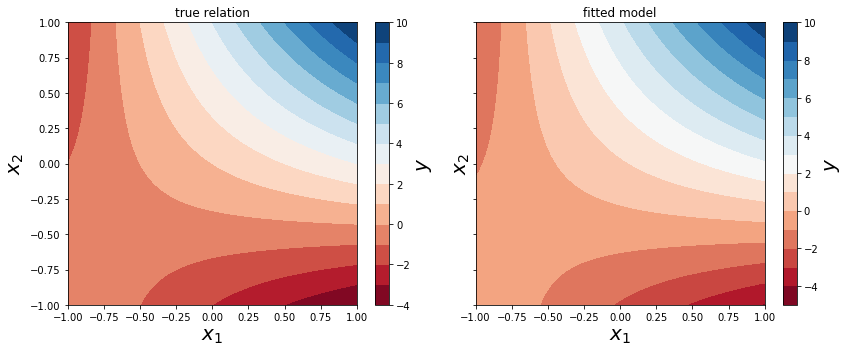

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(r"$y$", fontsize=20)

plot_y_contour(axes[0], y_true(X1, X2), "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")

fig.tight_layout()
fig.savefig("ch14-comparison-model-true.pdf")

### Datasets from R

In [93]:
dataset = sm.datasets.get_rdataset("Icecream", "Ecdat")

In [94]:
dataset.title

'Ice Cream Consumption'

In [95]:
print(dataset.__doc__)

+----------+-----------------+
| Icecream | R Documentation |
+----------+-----------------+

Ice Cream Consumption
---------------------

Description
~~~~~~~~~~~

four–weekly observations from 1951–03–18 to 1953–07–11

*number of observations* : 30

*observation* : country

*country* : United States

Usage
~~~~~

::

   data(Icecream)

Format
~~~~~~

A time serie containing :

cons
   consumption of ice cream per head (in pints);

income
   average family income per week (in US Dollars);

price
   price of ice cream (per pint);

temp
   average temperature (in Fahrenheit);

Source
~~~~~~

Hildreth, C. and J. Lu (1960) *Demand relations with autocorrelated
disturbances*, Technical Bulletin No 2765, Michigan State University.

References
~~~~~~~~~~

Verbeek, Marno (2004) *A Guide to Modern Econometrics*, John Wiley and
Sons, chapter 4.

See Also
~~~~~~~~

``Index.Source``, ``Index.Economics``, ``Index.Econometrics``,
``Index.Observations``,

``Index.Time.Series``



In [96]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
cons      30 non-null float64
income    30 non-null int64
price     30 non-null float64
temp      30 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.0 KB


In [97]:
model = smf.ols("cons ~ -1 + price + temp", data=dataset.data)

In [98]:
result = model.fit()

In [99]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1001.
Date:                Mon, 06 May 2019   Prob (F-statistic):           9.03e-27
Time:                        15:43:04   Log-Likelihood:                 51.903
No. Observations:                  30   AIC:                            -99.81
Df Residuals:                      28   BIC:                            -97.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          0.7254      0.093      7.805      0.0

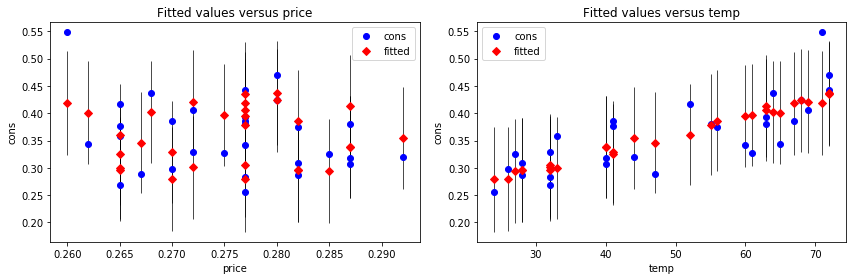

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

smg.plot_fit(result, 0, ax=ax1)
smg.plot_fit(result, 1, ax=ax2)

fig.tight_layout()
fig.savefig("ch14-regressionplots.pdf")

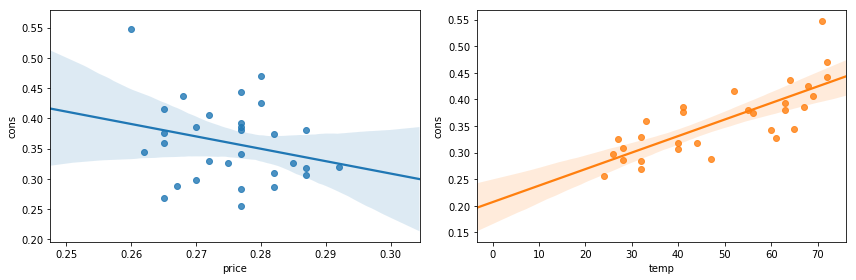

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot("price", "cons", dataset.data, ax=ax1);
sns.regplot("temp", "cons", dataset.data, ax=ax2);

fig.tight_layout()
fig.savefig("ch14-regressionplots-seaborn.pdf")

## Discrete regression, logistic regression

In [102]:
df = sm.datasets.get_rdataset("iris").data

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [104]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [105]:
df_subset = df[(df.Species == "versicolor") | (df.Species == "virginica" )].copy()

In [106]:
df_subset = df[df.Species.isin(["versicolor", "virginica"])].copy()

In [107]:
df_subset.Species = df_subset.Species.map({"versicolor": 1, "virginica": 0})

In [108]:
df_subset.rename(columns={"Sepal.Length": "Sepal_Length", "Sepal.Width": "Sepal_Width",
                          "Petal.Length": "Petal_Length", "Petal.Width": "Petal_Width"}, inplace=True)

In [109]:
df_subset.head(3)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


In [110]:
model = smf.logit("Species ~ Sepal_Length + Sepal_Width + Petal_Length + Petal_Width", data=df_subset)

In [111]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12


In [112]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Mon, 06 May 2019   Pseudo R-squ.:                  0.9142
Time:                        15:43:11   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       42.6378     25.708      1.659      0.097      -7.748      93.024
Sepal_Length     2.4652      2.394      1.030      0.303      -2.228       7.158
Sepal_Width      6.6809      4.480      1.49

In [113]:
print(result.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:                Species
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Sepal_Length     0.0445      0.038      1.163      0.245      -0.031       0.120
Sepal_Width      0.1207      0.064      1.891      0.059      -0.004       0.246
Petal_Length    -0.1703      0.057     -2.965      0.003      -0.283      -0.058
Petal_Width     -0.3303      0.110     -2.998      0.003      -0.546      -0.114


**Note:** Sepal_Length and Sepal_Width do not seem to contribute much to predictiveness of the model. 

In [114]:
model = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subset)

In [115]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10


In [116]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 May 2019   Pseudo R-squ.:                  0.8517
Time:                        15:43:13   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 2.303e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001      18.594      71.951
Petal_Length    -5.7545      2.306     -2.496      0.013     -10.274      -1.235
Petal_Width    -10.4467      3.756     -2.78

In [117]:
print(result.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:                Species
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Petal_Length    -0.1736      0.052     -3.347      0.001      -0.275      -0.072
Petal_Width     -0.3151      0.068     -4.608      0.000      -0.449      -0.181


In [118]:
params = result.params
beta0 = -params['Intercept']/params['Petal_Width']
beta1 = -params['Petal_Length']/params['Petal_Width']

In [119]:
df_new = pd.DataFrame({"Petal_Length": np.random.randn(20)*0.5 + 5,
                       "Petal_Width": np.random.randn(20)*0.5 + 1.7})

In [120]:
df_new["P-Species"] = result.predict(df_new)

In [121]:
df_new["P-Species"].head(3)

0    0.995472
1    0.799899
2    0.000033
Name: P-Species, dtype: float64

In [122]:
df_new["Species"] = (df_new["P-Species"] > 0.5).astype(int)

In [123]:
df_new.head()

,Petal_Length,Petal_Width,P-Species,Species
0,4.717684,1.218695,0.995472,1
1,5.280952,1.292013,0.799899,1
2,5.610778,2.230056,0.000033,0
3,4.458715,1.907844,0.421614,0
4,4.822227,1.938929,0.061070,0


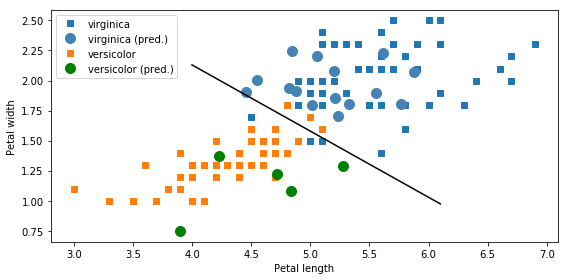

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(df_subset[df_subset.Species == 0].Petal_Length.values,
        df_subset[df_subset.Species == 0].Petal_Width.values, 's', label='virginica')
ax.plot(df_new[df_new.Species == 0].Petal_Length.values,
        df_new[df_new.Species == 0].Petal_Width.values,
        'o', markersize=10, color="steelblue", label='virginica (pred.)')

ax.plot(df_subset[df_subset.Species == 1].Petal_Length.values,
        df_subset[df_subset.Species == 1].Petal_Width.values, 's', label='versicolor')
ax.plot(df_new[df_new.Species == 1].Petal_Length.values,
        df_new[df_new.Species == 1].Petal_Width.values,
        'o', markersize=10, color="green", label='versicolor (pred.)')

_x = np.array([4.0, 6.1])
ax.plot(_x, beta0 + beta1 * _x, 'k')

ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend(loc=2)
fig.tight_layout()
fig.savefig("ch14-logit.pdf")

### Poisson distribution

In [125]:
dataset = sm.datasets.get_rdataset("discoveries")

In [126]:
df = dataset.data.set_index("time").rename(columns={"value": "discoveries"})

In [127]:
df.head(10).T

time,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869
discoveries,5,3,0,2,0,3,2,3,6,1


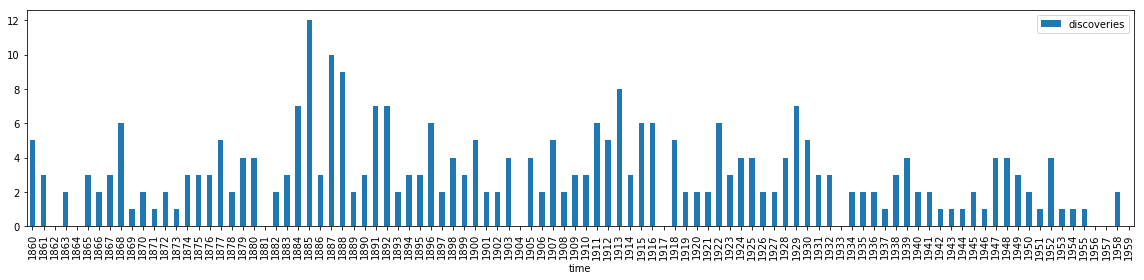

In [128]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
df.plot(kind='bar', ax=ax)
fig.tight_layout()
fig.savefig("ch14-discoveries.pdf")

In [129]:
model = smf.poisson("discoveries ~ 1", data=df)

In [130]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 2.168457
         Iterations 1


In [131]:
print(result.summary())

                          Poisson Regression Results                          
Dep. Variable:            discoveries   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Mon, 06 May 2019   Pseudo R-squ.:                   0.000
Time:                        15:43:21   Log-Likelihood:                -216.85
converged:                       True   LL-Null:                       -216.85
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1314      0.057     19.920      0.000       1.020       1.243


In [132]:
lmbda = np.exp(result.params) 

In [133]:
X = stats.poisson(lmbda)

In [134]:
result.conf_int()

,0,1
Intercept,1.020084,1.242721


In [135]:
X_ci_l = stats.poisson(np.exp(result.conf_int().values)[0, 0])

In [136]:
X_ci_u = stats.poisson(np.exp(result.conf_int().values)[0, 1])

In [137]:
v, k = np.histogram(df.values, bins=12, range=(0, 12), normed=True)

/Users/rob/miniconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


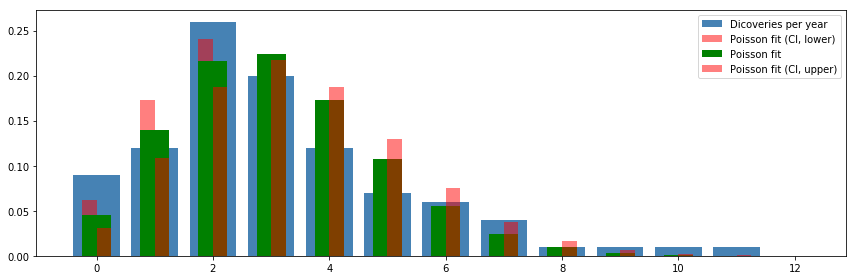

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.bar(k[:-1], v, color="steelblue",  align='center', label='Dicoveries per year') 
ax.bar(k-0.125, X_ci_l.pmf(k), color="red", alpha=0.5, align='center', width=0.25, label='Poisson fit (CI, lower)')
ax.bar(k, X.pmf(k), color="green",  align='center', width=0.5, label='Poisson fit')
ax.bar(k+0.125, X_ci_u.pmf(k), color="red",  alpha=0.5, align='center', width=0.25, label='Poisson fit (CI, upper)')

ax.legend()
fig.tight_layout()
fig.savefig("ch14-discoveries-per-year.pdf")

## Time series

In [139]:
df = pd.read_csv("temperature_outdoor_2014.tsv", header=None, delimiter="\t", names=["time", "temp"])
df.time = pd.to_datetime(df.time, unit="s")
df = df.set_index("time").resample("H").mean()

In [140]:
df_march = df[df.index.month == 3]

In [141]:
df_april = df[df.index.month == 4]

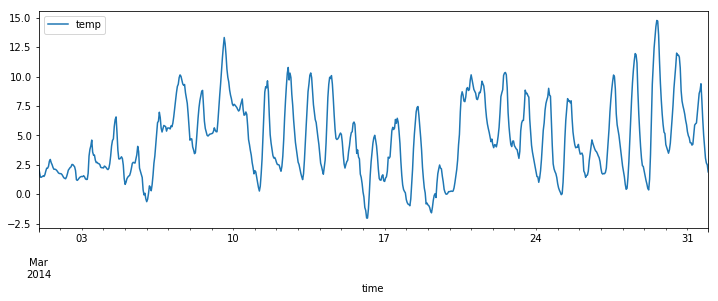

In [142]:
df_march.plot(figsize=(12, 4));

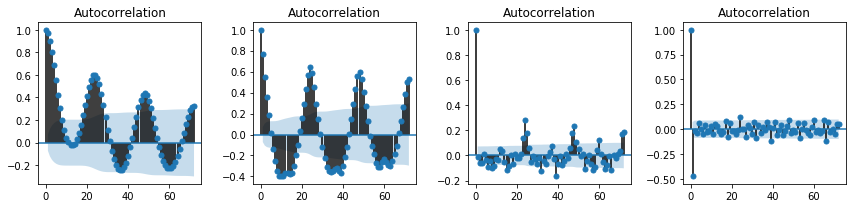

In [143]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
smg.tsa.plot_acf(df_march.temp, lags=72, ax=axes[0])
smg.tsa.plot_acf(df_march.temp.diff().dropna(), lags=72, ax=axes[1])
smg.tsa.plot_acf(df_march.temp.diff().diff().dropna(), lags=72, ax=axes[2])
smg.tsa.plot_acf(df_march.temp.diff().diff().diff().dropna(), lags=72, ax=axes[3])
fig.tight_layout()
fig.savefig("ch14-timeseries-autocorrelation.pdf")

In [144]:
model = sm.tsa.AR(df_march.temp)

In [145]:
result = model.fit(72)

In [146]:
sm.stats.durbin_watson(result.resid)

1.9985623006352906

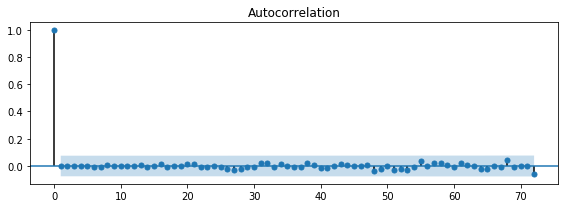

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
smg.tsa.plot_acf(result.resid, lags=72, ax=ax)
fig.tight_layout()
fig.savefig("ch14-timeseries-resid-acf.pdf")

/Users/rob/miniconda3/envs/py3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


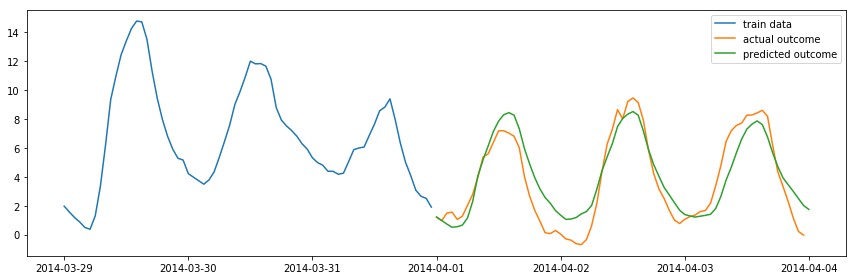

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(df_march.index.values[-72:], df_march.temp.values[-72:], label="train data")
ax.plot(df_april.index.values[:72], df_april.temp.values[:72], label="actual outcome")
ax.plot(pd.date_range("2014-04-01", "2014-04-4", freq="H").values,
        result.predict("2014-04-01", "2014-04-4"), label="predicted outcome")

ax.legend()
fig.tight_layout()
fig.savefig("ch14-timeseries-prediction.pdf")

In [149]:
# Using ARMA model on daily average temperatures

In [150]:
df_march = df_march.resample("D").mean()

In [151]:
df_april = df_april.resample("D").mean()

In [152]:
model = sm.tsa.ARMA(df_march, (4, 1))

In [153]:
result = model.fit()

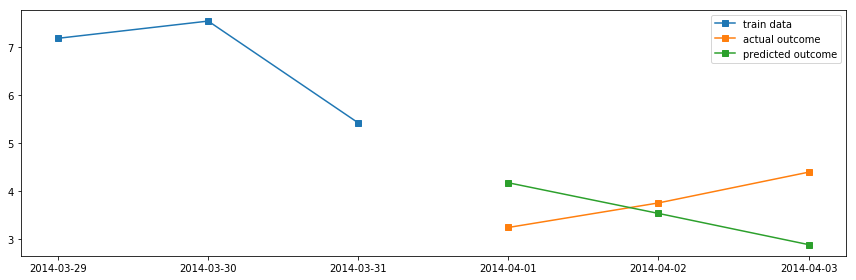

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(df_march.index.values[-3:], df_march.temp.values[-3:], 's-', label="train data")
ax.plot(df_april.index.values[:3], df_april.temp.values[:3], 's-', label="actual outcome")
ax.plot(pd.date_range("2014-04-01", "2014-04-3").values,
        result.predict("2014-04-01", "2014-04-3"), 's-', label="predicted outcome")
ax.legend()
fig.tight_layout()

# Versions

In [155]:
%reload_ext version_information

In [156]:
%version_information numpy, matplotlib, pandas, scipy, statsmodels, patsy

Software versions
Python 3.6.8 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.5.0
OS Darwin 18.2.0 x86_64 i386 64bit
numpy 1.16.3
matplotlib 3.0.3
pandas 0.24.2
scipy 1.2.1
statsmodels 0.9.0
patsy 0.5.1
Mon May 06 15:43:34 2019 JST